In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt


In [12]:
! head energy.py -n 14

#! /home/aware/anaconda3/bin/ipython

# coding: utf-8
# by Artemii Yanushevskyi

import os, sys
import pandas as pd
import matplotlib.pyplot as plt



try:
    case = sys.argv[1]
    f = open(os.path.join(case, 'energy.xvg'))


In [8]:
# os.listdir('8k_atoms/')
# f = open('8k_atoms/energy.xvg', 'r')
# text1 = f.read()
# f.close()
os.listdir('8k_atoms/')
f = open('8k_atoms/beta_values.csv', 'r')
text2 = f.read()
f.close()
# pd.read_csv('8k_atoms/energy.xvg').plot()

In [3]:
len(text2)

290544

In [4]:
text = "\n".join(text2.split("\n"))

In [5]:
text

'-0.514696,0.118583,0.542865,-0.197373,0.523874,2.31018,-1.11721,-0.229309,-0.571051,-0.0976714,2.61631,\n-0.51543,0.115516,0.49159,-0.266973,0.560358,2.536,-1.25858,-0.184197,-0.56432,-0.0041575,3.15308,\n-0.430552,0.0839722,0.442199,-0.467451,0.764681,5.41569,-0.703546,-0.0748835,-1.98638,-0.112107,2.76988,\n-0.179739,0.0822714,0.519981,-0.957486,0.991114,19.0461,-0.609457,-0.0858795,3.44343,-0.019741,2.48862,\n-0.17983,0.146469,0.766563,-1.23525,0.915921,20.4906,-0.727039,-0.0149861,2.6337,0.0865394,2.56154,\n-0.210327,0.255277,0.475319,-4.06924,0.868056,-14.8334,-0.740645,0.0543331,0.797864,1.00116,2.03968,\n-0.0368584,-0.0100439,0.0783777,0.0630634,-0.158728,-0.170408,-0.0892252,0.0109349,0.025963,0.125568,0.324519,\n-0.0343934,-0.0103797,0.0786518,0.0594556,-0.167532,-0.176639,-0.0873868,0.0187761,0.0249052,0.124334,0.334583,\n-0.0271339,-0.0108582,0.103607,0.0637241,-0.154376,-0.1878,-0.0937889,0.0181296,0.0242513,0.132575,0.329739,\n-0.0247604,-0.0122198,0.107611,0.0702428,-0.1

In [12]:
df = pd.read_csv('8k_atoms/beta_values.csv', header=None)
# df = pd.DataFrame(df, columns=[1,2,3,4,5,0])

In [13]:
# df = df.drop([8000], axis=1)
df.shape

(39454, 12)

In [41]:
df[range(500, 1000,1)].describe()

KeyError: "None of [Int64Index([500, 501, 502, 503, 504, 505, 506, 507, 508, 509,\n            ...\n            990, 991, 992, 993, 994, 995, 996, 997, 998, 999],\n           dtype='int64', length=500)] are in the [columns]"

In [164]:
stat = df.describe()

In [165]:
stat.loc['25%']

0      -0.052917
1      -0.047748
2      -0.046927
3      -0.044768
4      -0.052558
5      -0.047492
6      -0.030483
7      -0.046826
8      -0.020231
9      -0.057549
10     -0.021145
11     -0.039114
12     -0.064283
13     -0.024826
14     -0.041238
15     -0.029979
16     -0.046502
17     -0.070868
18     -0.045867
19     -0.043445
20     -0.037219
21     -0.042938
22     -0.050857
23     -0.036171
24     -0.026956
25     -0.092921
26     -0.023246
27     -0.041958
28     -0.027259
29     -0.036562
          ...   
7970   -0.015414
7971   -0.051121
7972   -0.031981
7973   -0.045224
7974   -0.049498
7975   -0.048769
7976   -0.029381
7977   -0.065418
7978   -0.033120
7979   -0.011788
7980   -0.053343
7981   -0.060906
7982   -0.030405
7983   -0.080828
7984   -0.042925
7985   -0.039961
7986   -0.032587
7987   -0.062624
7988   -0.036899
7989   -0.066196
7990   -0.056056
7991   -0.076847
7992   -0.031207
7993   -0.031479
7994   -0.015536
7995   -0.017212
7996   -0.054078
7997   -0.0362

In [26]:
# stat.max().max()
# df.drop([11], axis=1)
df.columns = df.columns * 500

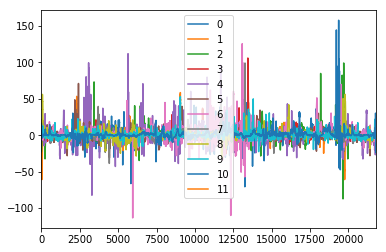

In [5]:
df.plot() # ylim=(-10,10))
plt.show()

In [38]:
df.describe().loc[['mean']]

,0,500,1000,1500,2000,2500,3000,3500,4000,4500,5000
mean,-0.124215,0.022609,-0.117862,0.167081,0.003309,0.001214,-0.069807,0.044439,0.17719,0.376209,0.546272


In [132]:
cat energy.py

#! /home/aware/anaconda3/bin/ipython

# coding: utf-8
# by Artemii Yanushevskyi

import os, sys
import pandas as pd
import matplotlib.pyplot as plt



try:
    case = sys.argv[1]
    f = open(os.path.join(case, 'energy.xvg'))
except FileNotFoundError as ex:
    print("File 'energy.xvg' doesn't exist. We need to convert the binary energy file (ener.edr) to energy text file (energy.xvg) using command `gmx energy` and typing '3 4 5 6'.")
    raise ex
except IndexError as ex:
    print("Write the version of the simulation.")
    raise ex

text = f.read()

X = []

# parsing
for line in text.split('\n'):
    if line != '':
        if line[0] in '#@' or line == '':
            if line[0:3] == '@ s':
                print(line[4:])
            continue

        values = map(float, line.split())
        print(line)
        X.append(list(values))


df = pd.DataFrame(X, columns=['index', 'Potential', 'Kinetic En.', 'Total Energy', 'Temperature']).drop('index', axis=1)
df.plot(ls='-', marker='.')


 legend "Potential"
 legend "Kinetic En."
 legend "Total Energy"
 legend "Temperature"
    0.000000  -4944.937012  31035.164062  26090.226562  311.094940
    0.100000  -4977.835938  31036.316406  26058.480469  311.106476
    0.200000  -4950.956543  30991.937500  26040.980469  310.661621
    0.300000  -4944.751953  30989.769531  26045.017578  310.639893
    0.400000  -4919.399414  30972.714844  26053.316406  310.468933
    0.500000  -4846.336914  30957.208984  26110.871094  310.313507
    0.600000  -4783.593750  30889.714844  26106.121094  309.636963
    0.700000  -4774.263184  30870.298828  26096.035156  309.442322
    0.800000  -4796.347656  31007.414062  26211.066406  310.816772
    0.900000  -4795.246094  31098.261719  26303.015625  311.727417
    1.000000  -4813.338867  31115.267578  26301.929688  311.897888
    1.100000  -4812.953125  31047.875000  26234.921875  311.222351
    1.200000  -4770.280273  30942.945312  26172.664062  310.170532
    1.300000  -4741.317383  30846.962891  

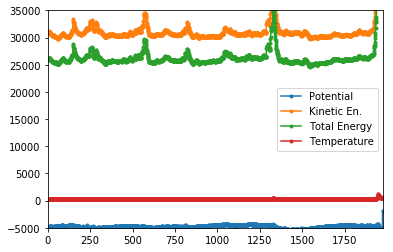

In [6]:
f = open('8k_atoms/energy.xvg')

text = f.read()

X = []

# parsing
for line in text.split('\n'):
    if line != '':
        if line[0] in '#@' or line == '':
            if line[0:3] == '@ s':
                print(line[4:])
            continue

        values = map(float, line.split())
        print(line)
        X.append(list(values))


df = pd.DataFrame(X, columns=['index', 'Potential', 'Kinetic En.', 'Total Energy', 'Temperature']).drop('index', axis=1)
df.plot(ls='-', marker='.', ylim=(-5000,35000))

In [158]:
1716/12

143.0

In [ ]:
1716
